https://www.sec.gov/Archives/edgar/data/895421/000183988225020937/ms7561_424b2-11018.htm

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
T0 = pd.to_datetime('2025-04-04', format='%Y-%m-%d')
T1 = pd.to_datetime('2025-07-02', format = '%Y-%m-%d')
T2 = pd.to_datetime('2030-01-02', format='%Y-%m-%d')
Tfinal = pd.to_datetime('2030-03-29', format='%Y-%m-%d')

In [109]:
IA_days = (T1-T0).days+2
FA_days = (Tfinal-T2).days
IA_FA_Jump = (T2-T1).days
print(IA_days, FA_days)

91 86


In [110]:
IA0 = (1910.55 + 1827.03)/2
S0 = 1827.03

In [117]:
# Monte Carlo Simulation Parameters
N = 7000  # Number of paths
Simulations = 100  # Number of simulations
r = 0.0335  # drift
sigma = 0.208  # volatility

#no. of days in initial and final averaging periods for simulation
n_ia = IA_days-2
n_fa = FA_days

S_ia = np.zeros((N+1, n_ia+1))
S_fa = np.zeros((N+1, n_fa+1))
IA = np.zeros(N+1)
FA = np.zeros(N+1)    
K = np.zeros(N+1)
Payoff = np.zeros(N+1)

Payoff_final = np.zeros(Simulations)

for q in range(Simulations):
    for i in range(1,N+1):
        S_ia[i][0] = S0

    for i in range(1,N+1):
        for j in range(1,n_ia+1):
            S_ia[i][j] = S_ia[i][j-1]*np.exp((r-0.5*sigma**2)*1/365 + sigma*np.sqrt(1/365)*np.random.normal(0,1))
        
        S_fa[i][1] = S_ia[i][n_ia]*np.exp((r-0.5*sigma**2)*(IA_FA_Jump)/365 + sigma*np.sqrt(IA_FA_Jump/365)*np.random.normal(0,1))

        for j in range(2, n_fa+1):
            S_fa[i][j] = S_fa[i][j-1]*np.exp((r-0.5*sigma**2)*1/365 + sigma*np.sqrt(1/365)*np.random.normal(0,1))

    for i in range(1,N+1):
        IA[i] = (S_ia[i][1:].sum()+ IA0 )/(n_ia+1)
        FA[i] = S_ia[i][1:].mean()
        K[i] = 0.85 * IA[i]

        # Calculate the payoff
        if FA[i] > IA[i]:
            Payoff[i] = min(1553.5, 1385 + 0.525*1000*(FA[i] - IA[i])/IA[i])
        elif FA[i] > K[i]:
            Payoff[i] = 1000+ 0.257*1000*(FA[i] - K[i])/IA[i]
        else:
            Payoff[i] = 150 + 1000*FA[i]/IA[i]
        Payoff[i] = np.exp(-r*(Tfinal - T0).days/365) * Payoff[i]

    Payoff_final[q] = Payoff[1:].mean()

counts, bin_edges = np.histogram(Payoff_final, bins = 10)
print("Counts: ", counts)
print("Bin edges: ", bin_edges)

Counts:  [ 2  5  9 14 20 15 12 10 10  3]
Bin edges:  [982.07845389 982.81608931 983.55372474 984.29136016 985.02899559
 985.76663101 986.50426644 987.24190186 987.97953728 988.71717271
 989.45480813]


Text(0.5, 1.0, 'Histogram of Payoffs')

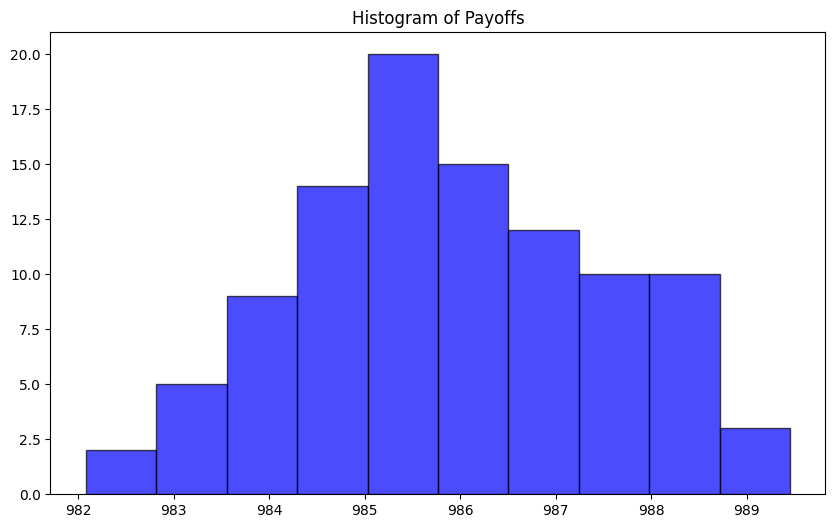

In [118]:
plt.figure(figsize = (10,6))
plt.hist(Payoff_final, bins = 10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Payoffs')